# What is the True Normal Human Body Temperature? 


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('normtemp.csv', delim_whitespace=True, names=['Temperature','Gender','HearRate'])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
df.head()

,Temperature,Gender,HearRate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [6]:
temp = df['Temperature']
heart_r = df['HearRate']

## Is the distribution of body temperature normal?
## Is the sample size large? Are the observations independent?

Central Limit Thereom tells us:
Normal distribution will be a good model for the sampling distribution of the sample mean under certain conditions: 
1. Parent population is symmetric
2. Sample size is large enough (usually n>30). 

In [8]:
temp_mean = np.mean(temp)
temp_std = np.std(temp)
temp_len = len(temp)

print('Temperature mean is:', temp_mean)
print('Temperature standard deviation is:', temp_std)
print('Size of the sample is:', temp_len)

Temperature mean is: 98.24923076923076
Temperature standard deviation is: 0.730357778905038
Size of the sample is: 130


The above result shows the sample size is indeed larger than 30. 

### Sample size is large

So the central limit thereom stands. The sample mean for the body temperature CAN be treated as normal distribution. 

Next I generated a random normal distribution use the same mean and standard deviation from the sample temperature. The histogram of the sample temperature and normal temperature are plotted below:

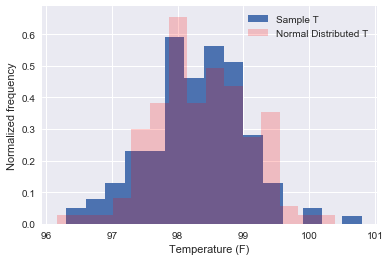

In [21]:
#Build a 1D normal array with the same temperature mean and standard deviation
temp_norm = np.random.normal(temp_mean, temp_std, 130)

#Visualize the sample and normal distribution
_ = plt.hist(temp, bins=15, normed=True)
_ = plt.hist(temp_norm,bins=15, color='red', normed=True, alpha=0.2)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Normalized frequency')
_ = plt.legend(['Sample T', 'Normal Distributed T'])

In [48]:
#Range of temperature with mean +- 3*standard_deviation
normal_range = (temp_mean-3*temp_std), (temp_mean+3*temp_std)
print(normal_range)

(96.05815743251566, 100.44030410594587)


The visulization shows the body temperature distribution seems very close to the normal distribution. It has a signature bell shape. A close look to the lower and upper limit of the data shows almost all the data points are between mean+-3*standard_deviation, which is another trait of normal distribution. 

In the content below, I explore how identical the sample distribution and the normal distribution is use null hypothesis and bootstraping. ** H0: temp and temp_norm are identical. **

In [14]:
#Are they identical?
#Define diff_of_means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff


# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(temp,temp_norm)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((temp, temp_norm))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(temp)],
                                     bs_sample[len(temp):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)


p-value = 0.5623


The large p-value indicates that the distribution of sample temperature being normal distribution is highly possible.

### Summarize  above observation: the distribution of the body temperature is normal. 

In [16]:
# Define ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

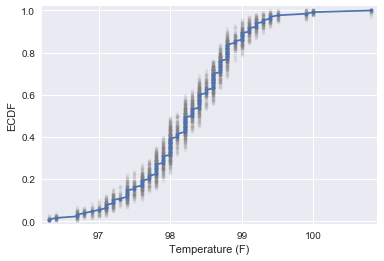

In [20]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(temp, size=len(temp))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(temp)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [19]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#generate bootstrap replicates
def draw_bs_reps(data, func, size=1):
    #"""Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


## Is the true population mean really 98.6 degrees F?

The above calculation already gave the sample mean of the temperature: 98.25F. It is quite different from the typical normal temperature: 98.6F. Could this be from the random choice of the sample? Or is 98.6F not statistically probable to be the true population mean? Below is a bootstrap hypothesis test on the sample temperature. 

**The null hypothesis here is the true population mean could be 98.6F. **

0.0640566146952
0.0640863244587
[ 98.08461154  98.41692692]
P value: 0.0


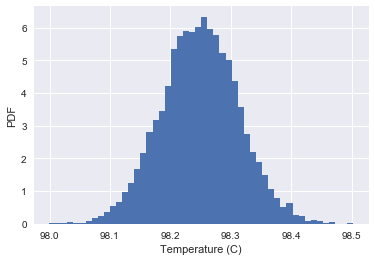

In [22]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(temp, np.mean, 10000)

# Compute and print SEM
sem = np.std(temp) / np.sqrt(len(temp))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Calculate the 95% confidence interval of the temperature
bs_ci = np.percentile(bs_replicates, [0.5,99.5])
print(bs_ci)

# Calculate the possiblity of a temperature larger than 98.6
p = np.sum(bs_replicates >= 98.6) /len(bs_replicates)
print('P value:', p)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Temperature (C)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

The p value is very small. And the 99% confidence interval for the true population mean is between 98.1F and 98.4F. It does not include the 98.6F. 

Next the one sample hypothesis is used to test the same hypothesis. Note here I chose one sample because we are comparing the sample data to a single temperature value. 

In [24]:
# Make an array of translated temperatures
temp_b = temp-np.mean(temp)+98.6

# Take bootstrap replicates of translated temperatures: bs_replicates
bs_replicates = draw_bs_reps(temp_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature: p
p = np.sum(bs_replicates <= np.mean(temp)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0


This gives that the p value from one sample test is very small. 98.6F is unlikely to be the true mean of the population body temperature. 

The problem can also be examined by calculating a t-statistic using the standard error of the mean. Note t-statistic is being chosen here since the sample size is not too large.

From the calculation above, we know the sample standard deviation is 0.73, and the standard error of the mean (sem) is .064. Thus the calculated t (using the sample mean of 98.25) is 5.45. It gives the p value < 0.0005. It again means the null hypothesis is invalid. 

### All the above hypothesis tests conclude the true population mean is very unlikely 98.6F

## Draw a small sample of size 10 from the data and repeat both frequentist tests.

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the t and z test statistic?

0.0640566146952
0.194753690594
[ 98.0427   98.72785]
P value: 0.1


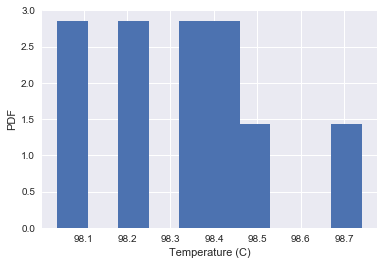

In [58]:
def bootstrap_replicate_10(data, func):
    return func(np.random.choice(data, size=10))

#generate bootstrap replicates
def draw_bs_reps_10(data, func, size=1):
    #"""Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_10(data, func)

    return bs_replicates



# Take 10 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps_10(temp, np.mean, 10)

# Compute and print SEM
sem = np.std(temp) / np.sqrt(len(temp))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Calculate the 95% confidence interval of the temperature
bs_ci = np.percentile(bs_replicates, [0.5,99.5])
print(bs_ci)

# Calculate the possiblity of a temperature larger than 98.6
p = np.sum(bs_replicates >= 98.6) /len(bs_replicates)
print('P value:', p)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=10, normed=True)
_ = plt.xlabel('Temperature (C)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [59]:
# Make an array of translated temperatures
temp_b = temp-np.mean(temp)+98.6

# Take bootstrap replicates of translated temperatures: bs_replicates
bs_replicates = draw_bs_reps_10(temp_b, np.mean, 10)

# Compute fraction of replicates that are less than the observed temperature: p
p = np.sum(bs_replicates <= np.mean(temp)) / 10

# Print the p-value
print('p = ', p)



p =  0.0


The p value increased for the boostrap approach. It stayed small for the one sample frequentist test. The frequestist test should be chose in this case. For small sampling size, t-test needs to be used.

## At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [70]:
#bootsraping method for normal temperature range with a 95% confidence interval
def bootstrap_replicate_ci(data, penc, size=1):
    
    bs_replicates_start = np.empty(size)
    bs_replicates_end = np.empty(size)
    start = (100-penc)/2
    end = penc+(100-penc)/2
    
    for i in range(size):
        bs_data = np.random.choice(data, size=len(data))
        bs_replicates_start[i], bs_replicates_end[i] = np.percentile(bs_data, [start,end])
    
    return bs_replicates_start, bs_replicates_end
# Take 10,000 bootstrap replicates of the mean: bs_replicates

bs_replicates_start, bs_replicates_end = bootstrap_replicate_ci(temp, 95, 10000)

print('The normal temperature with a 95% confidence interval is:', np.mean(bs_replicates_start), 'to', np.mean(bs_replicates_end))

The normal temperature with a 95% confidence interval is: 96.772237 to 99.57678875


In [80]:
#Frequentist test:
#From the t-table: 95% confidence interval ==> t=1.98
t = 1.98
start_t = temp_mean - t * temp_std
end_t = temp_mean + t*temp_std
print('The normal temperature with a 95% confidence interval is:', start_t, 'to', end_t)

The normal temperature with a 95% confidence interval is: 96.80312236699879 to 99.69533917146273


The results above are very close to each other: 
### The temperature could be considered normal in the range of 96.8 and 99.7F. 

## Is there a significant difference between males and females in normal temperature?

In [41]:
temp_f = df[df['Gender']==2]['Temperature']

In [42]:
temp_m = df[df['Gender']==1]['Temperature']

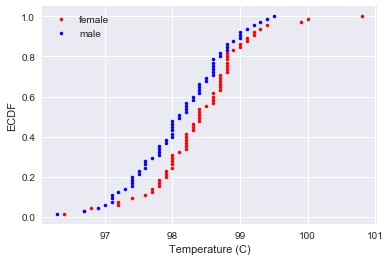

In [55]:
x_f, y_f =ecdf(temp_f)
x_m, y_m =ecdf(temp_m)

_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_ = plt.xlabel('Temperature (C)')
_ = plt.ylabel('ECDF')
_ = plt.legend(['female','male'])

The ecdf plot visually shows the distributions of the body temperature of females and males. We can clearly see a difference. Next I choose to use the permutation test of the two sample means to compare the two groups. 

**The null hypothesis: females and males have the same normal body temperature.**

In [51]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[0:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [52]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [81]:

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(temp_f, temp_m)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(temp_f, temp_m,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates > empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0131


The P value from the bootstrap permutation test of the two samples give 0.013 as the result. It is fairly small (< 0.05) which means the sample are not likely to be the same. The difference is statistically significant if the significant level is at 0.05. The null hypothesis is invalid. The body temperature of females and males are different.

Another way to examine this is to calculate the two sample t-test. 

In [85]:
temp_f_mean = np.mean(temp_f)
temp_f_std = np.std(temp_f)
n_f = len(temp_f)

temp_m_mean = np.mean(temp_m)
temp_m_std = np.std(temp_m)
n_m = len(temp_m)

t = (temp_f_mean-temp_m_mean) / np.sqrt((temp_f_std **2)/n_f + (temp_m_std **2)/n_f)
print('t statistics:', t)

t statistics: 2.30322028919


From the t-table, t=2.3 gives the p-value of between 0.01-0.025. It agrees with the result from the bootstraping test. 
Here we can draw the conclusion: 
### The body temperature of females and males are different.



## Correlation between heart rate and temperature

In [86]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


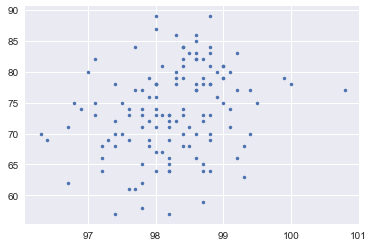

In [87]:
_ = plt.plot(temp, heart_r, marker='.', linestyle='none')


In [88]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

[ 1.10976433  3.85904392]


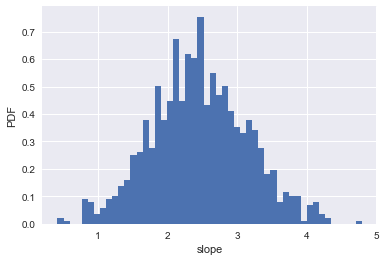

In [89]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(temp, heart_r, 1000)

slope, intercept = np.polyfit(temp, heart_r, 1)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

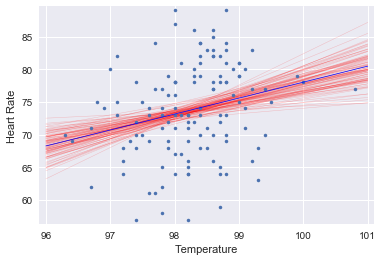

In [90]:
# Generate array of x-values for bootstrap lines: x
x = np.array([96,101])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(temp, heart_r, marker='.', linestyle='none')

_ = plt.plot(x, slope*x+intercept, linewidth=0.7, alpha=1, color='blue')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Heart Rate')
plt.margins(0.02)
plt.show()

In [91]:
# Compute observed correlation: r_obs
r_obs = pearson_r(temp,heart_r)
print("Pearson correlation value for empirical data:", r_obs)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(100000)

# Draw replicates
for i in range(100000):
    # Permute illiteracy measurments: illiteracy_permuted
    temp_permuted = np.random.permutation(temp)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(temp_permuted,heart_r)

# Compute p-value: p
p = np.sum(perm_replicates>r_obs) / len(perm_replicates)
print('p-val =', p)


Pearson correlation value for empirical data: 0.253656402721
p-val = 0.00162


### The small p value strongly suggests that the correlation of temperature and heart rate is not by mere chance. 

